# Work with data

Спектакль смотрит на тебя глазами девушки

In [2]:
class Consts:
    MAX_COUNT_UNIQOE_FEATURES = 13
    LOWER_LIMIT_MEAN_HUMIDITY = 63
    UPPER_LIMIT_MEAN_HUMIDITY = 68.5 # IN PERCENT %
    LOWER_LIMIT_MEAN_TEMP = 15
    UPPER_LIMIT_MEAN_TEMP = 30


In [3]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Protocol

In [4]:
rentals = pl.read_csv("dataset/synthetic_rentals.csv")
stations = pl.read_csv("dataset/synthetic_stations.csv")
users = pl.read_csv("dataset/synthetic_users.csv")


# data preprocessing 

In [5]:
display(users.sample(5))

display(rentals.sample(5))

display(stations.sample(5))


user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
str,str,str,str,str,i64
"""U0037""","""periodic""","""2022-06-04""","""7,8,17,18,19""","""weekday""",11
"""U0859""","""periodic""","""2023-03-29""","""10,11,12,13,14,15,16""","""weekday""",11
"""U0149""","""frequent""","""2023-09-01""","""7,8,9,12,13,17,18,19""","""all""",30
"""U0597""","""periodic""","""2025-02-08""","""10,11,12,13,14,15,16""","""all""",11
"""U0884""","""frequent""","""2022-08-08""","""7,8,9,12,13,17,18,19""","""weekday""",27


rental_id,date,hour,minute,user_id,station_id,duration_minutes
str,str,i64,i64,str,str,i64
"""R029648""","""2017-01-23""",7,8,"""U0355""","""S088""",30
"""R029775""","""2017-01-23""",9,39,"""U0592""","""S034""",28
"""R008550""","""2017-01-07""",7,51,"""U0386""","""S079""",18
"""R023001""","""2017-01-18""",1,27,"""U0153""","""S025""",27
"""R008213""","""2017-01-06""",23,3,"""U0595""","""S076""",47


station_id,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity
str,str,str,f64,f64,str,i64,str,str,f64
"""S013""","""Eunpyeong Station 7""","""Eunpyeong""",37.527545,127.176059,"""recreation""",21,"""10,11,12,13,14,15,16,17""","""weekend""",0.56
"""S047""","""Nowon Station 7""","""Nowon""",37.6148,126.908297,"""residential""",32,"""7,8,18,19,20""","""all""",0.4
"""S070""","""Yeongdeungpo Station 1""","""Yeongdeungpo""",37.680425,127.019331,"""business""",36,"""8,9,17,18,19""","""weekday""",0.82
"""S051""","""Dongdaemun Station 9""","""Dongdaemun""",37.450651,127.127249,"""mixed""",32,"""8,9,12,13,17,18,19""","""all""",0.56
"""S041""","""Dongdaemun Station 2""","""Dongdaemun""",37.512134,127.14381,"""residential""",34,"""7,8,18,19,20""","""all""",0.52


In [6]:
rentals_stations_df = rentals.join(stations, on="station_id", how="left")  
unified_df = rentals_stations_df.join(users, on="user_id", how="left")

unified_df

rental_id,date,hour,minute,user_id,station_id,duration_minutes,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
str,str,i64,i64,str,str,i64,str,str,f64,f64,str,i64,str,str,f64,str,str,str,str,i64
"""R000000""","""2017-01-01""",0,45,"""U0010""","""S034""",28,"""Jongno Station 2""","""Jongno""",37.548081,127.089129,"""business""",38,"""8,9,17,18,19""","""weekday""",0.57,"""rare""","""2022-05-12""","""10,11,12,13,14""","""weekend""",3
"""R000001""","""2017-01-01""",0,17,"""U0824""","""S031""",31,"""Seocho Station 2""","""Seocho""",37.429762,127.110368,"""residential""",19,"""7,8,18,19,20""","""all""",0.68,"""periodic""","""2024-10-08""","""7,8,17,18,19""","""weekday""",11
"""R000002""","""2017-01-01""",0,38,"""U0954""","""S035""",45,"""Seodaemun Station 5""","""Seodaemun""",37.529528,126.872021,"""transit""",38,"""7,8,9,17,18,19,20""","""weekday""",0.77,"""rare""","""2024-05-26""","""7,8,9""","""weekend""",2
"""R000003""","""2017-01-01""",0,41,"""U0047""","""S061""",55,"""Mapo Station 5""","""Mapo""",37.662058,126.992142,"""residential""",19,"""7,8,18,19,20""","""all""",0.67,"""periodic""","""2023-06-17""","""7,8,17,18,19""","""weekend""",11
"""R000004""","""2017-01-01""",0,25,"""U0908""","""S079""",21,"""Gangnam Station 10""","""Gangnam""",37.649585,126.953299,"""business""",21,"""8,9,17,18,19""","""weekday""",0.87,"""periodic""","""2022-06-10""","""10,11,12,13,14,15,16""","""weekend""",9
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""R039700""","""2017-01-31""",0,52,"""U0450""","""S028""",43,"""Eunpyeong Station 5""","""Eunpyeong""",37.549747,126.820877,"""residential""",28,"""7,8,18,19,20""","""all""",0.36,"""frequent""","""2024-07-25""","""7,8,9,12,13,17,18,19""","""weekday""",31
"""R039701""","""2017-01-31""",0,58,"""U0335""","""S098""",47,"""Yongsan Station 8""","""Yongsan""",37.655234,126.86414,"""mixed""",34,"""8,9,12,13,17,18,19""","""all""",0.42,"""frequent""","""2024-03-01""","""7,8,9,17,18,19""","""weekday""",35
"""R039702""","""2017-01-31""",0,0,"""U0628""","""S040""",52,"""Gangnam Station 2""","""Gangnam""",37.429918,127.072508,"""transit""",41,"""7,8,9,17,18,19,20""","""weekday""",0.74,"""rare""","""2024-06-17""","""7,8,9""","""weekend""",4


In [7]:
unified_df.describe()

statistic,rental_id,date,hour,minute,user_id,station_id,duration_minutes,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
str,str,str,f64,f64,str,str,f64,str,str,f64,f64,str,f64,str,str,f64,str,str,str,str,f64
"""count""","""39705""","""39705""",39705.0,39705.0,"""39705""","""39705""",39705.0,"""39705""","""39705""",39705.0,39705.0,"""39705""",39705.0,"""39705""","""39705""",39705.0,"""39705""","""39705""","""39705""","""39705""",39705.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""",0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""",0.0
"""mean""",null,null,11.429165,29.380909,null,null,35.656315,null,null,37.558014,126.986951,null,31.907191,null,null,0.624896,null,null,null,null,11.660773
"""std""",null,null,6.866742,17.333237,null,null,18.916603,null,null,0.089335,0.120044,null,10.204716,null,null,0.160988,null,null,null,null,10.399348
"""min""","""R000000""","""2017-01-01""",0.0,0.0,"""U0001""","""S001""",10.0,"""Dongdaemun Station 1""","""Dongdaemun""",37.420314,126.780412,"""business""",15.0,"""10,11,12,13,14,15,16,17""","""all""",0.36,"""frequent""","""2022-03-08""","""10,11,12,13,14""","""all""",1.0
"""25%""",null,null,6.0,14.0,null,null,21.0,null,null,37.480571,126.870216,null,24.0,null,null,0.5,null,null,null,null,4.0
"""50%""",null,null,11.0,29.0,null,null,31.0,null,null,37.557532,126.997293,null,32.0,null,null,0.61,null,null,null,null,8.0
"""75%""",null,null,17.0,44.0,null,null,47.0,null,null,37.651338,127.088394,null,38.0,null,null,0.75,null,null,null,null,15.0
"""max""","""R039704""","""2017-01-31""",23.0,59.0,"""U1000""","""S100""",120.0,"""Yongsan Station 9""","""Yongsan""",37.698974,127.176059,"""transit""",59.0,"""8,9,17,18,19""","""weekend""",0.99,"""rare""","""2025-03-05""","""9,10,11,12,13,14,15,16,17,18,1…","""weekend""",40.0


### Tак как если мы заменим категорилаьные числа на 0 1 2 3 4, то у нас появится некий порядок в данных, в категориальных признаках такого быть не должно, поэтому можно добавить колонки типа is_sunday, is_saturday и т.д если их не больше 20 условно (мы увеличим датасет, но там всего 40_000 строк, поэтому на работу не повлияет)

Загрузите набор данных о прокате велосипедов в Сеуле и исследуйте
его структуру.

Выполните предварительную обработку данных (например, удалите
пропущенные значения или преобразуйте категориальные переменные).

In [8]:
cat_cols = [col for col in unified_df.columns if unified_df[col].unique().shape[0] < Consts.MAX_COUNT_UNIQOE_FEATURES]

# нет пустых значений 

In [9]:
unified_df.null_count()

rental_id,date,hour,minute,user_id,station_id,duration_minutes,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
def get_df_with_cat_binary_cols(cat_cols: list, df: pl.DataFrame) -> pl.DataFrame:
      df = df.with_columns(
          [pl.when(pl.col(cat_col) == val)
          .then(1)
          .otherwise(0)
          .alias(f"{cat_col}_{val}") for cat_col in cat_cols for val in
        df[cat_col].unique().to_list()]
        )
      return df

unifield_df_with_binary_cat_cols = get_df_with_cat_binary_cols(cat_cols, df=unified_df)

In [11]:
unifield_df_with_binary_cat_cols.sample(3)

rental_id,date,hour,minute,user_id,station_id,duration_minutes,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month,district_Nowon,district_Jongno,district_Seodaemun,district_Mapo,district_Gangnam,district_Dongdaemun,district_Seocho,district_Eunpyeong,district_Yeongdeungpo,district_Yongsan,location_type_transit,location_type_residential,location_type_recreation,location_type_business,location_type_mixed,"peak_hours_8,9,12,13,17,18,19","peak_hours_7,8,9,17,18,19,20","peak_hours_7,8,18,19,20","peak_hours_10,11,12,13,14,15,16,17","peak_hours_8,9,17,18,19",peak_days_weekend,peak_days_all,peak_days_weekday,user_type_periodic,user_type_frequent,user_type_rare,"preferred_hours_7,8,17,18,19","preferred_hours_7,8,9,17,18,19","preferred_hours_7,8,9,12,13,17,18,19","preferred_hours_16,17,18,19,20","preferred_hours_10,11,12,13,14","preferred_hours_9,10,11,12,13,14,15,16,17,18,19,20","preferred_hours_10,11,12,13,14,15,16","preferred_hours_7,8,9",preferred_days_weekday,preferred_days_weekend,preferred_days_all
str,str,i64,i64,str,str,i64,str,str,f64,f64,str,i64,str,str,f64,str,str,str,str,i64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""R022541""","""2017-01-17""",17,49,"""U0195""","""S046""",11,"""Dongdaemun Station 10""","""Dongdaemun""",37.421423,126.904781,"""residential""",32,"""7,8,18,19,20""","""all""",0.55,"""periodic""","""2022-09-25""","""10,11,12,13,14,15,16""","""all""",8,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
"""R005531""","""2017-01-05""",4,9,"""U0350""","""S053""",31,"""Jongno Station 9""","""Jongno""",37.697613,127.0051,"""transit""",45,"""7,8,9,17,18,19,20""","""weekday""",0.68,"""periodic""","""2024-04-29""","""10,11,12,13,14,15,16""","""weekend""",11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
"""R010461""","""2017-01-08""",18,43,"""U0996""","""S096""",18,"""Yeongdeungpo Station 7""","""Yeongdeungpo""",37.42516,126.787347,"""transit""",41,"""7,8,9,17,18,19,20""","""weekday""",0.83,"""frequent""","""2022-09-08""","""7,8,9,17,18,19""","""weekday""",15,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [12]:
unified_df_datetime = unifield_df_with_binary_cat_cols.with_columns(
      pl.datetime(
          year=pl.col("date").str.strptime(pl.Date,
  "%Y-%m-%d").dt.year(),
          month=pl.col("date").str.strptime(pl.Date,
  "%Y-%m-%d").dt.month(),
          day=pl.col("date").str.strptime(pl.Date, "%Y-%m-%d").dt.day(),
          hour=pl.col("hour"),
          minute=pl.col("minute")
      ).alias("datetime")
  )

unified_df_timestamp = unified_df_datetime.with_columns(
    pl.col("datetime").dt.epoch(time_unit="s").alias("datetime").alias("unix_timestamp")
)

# work with numpy

In [13]:
def get_numpy_col_from_num(df: pl.DataFrame, col: str) -> np.ndarray:
    return df.select(col).to_numpy().flatten()

duration_vec = get_numpy_col_from_num(unified_df_timestamp, "duration_minutes")
timestamp_vec = get_numpy_col_from_num(unified_df_timestamp, "unix_timestamp")
capacity_vec = get_numpy_col_from_num(unified_df_timestamp, "capacity")

temp = np.random.uniform(
    low=Consts.LOWER_LIMIT_MEAN_TEMP, 
    high=Consts.UPPER_LIMIT_MEAN_TEMP,
    size=unified_df_timestamp.shape[0]
    )

humidity = np.random.uniform(
    low=Consts.LOWER_LIMIT_MEAN_HUMIDITY,
    high=Consts.UPPER_LIMIT_MEAN_HUMIDITY,
    size=unified_df_timestamp.shape[0]
    ) 

print(timestamp_vec.shape)
timestamp_vec

(39705,)


array([1483231500, 1483229820, 1483231080, ..., 1485820800, 1485821580,
       1485822660], shape=(39705,))

In [14]:
print(duration_vec[duration_vec > np.quantile(duration_vec, 0.999)])  
print(temp[temp > np.quantile(temp, 0.999)])  
print(humidity[humidity > 67.5]) 


[120 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120
 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120 120]
[29.99178461 29.99023364 29.9911623  29.98497505 29.99895927 29.99838662
 29.99981623 29.98933949 29.99087849 29.99067465 29.99628091 29.99560093
 29.99541459 29.99081304 29.99407627 29.99008321 29.98624468 29.99372016
 29.99587397 29.99342367 29.99856157 29.9893015  29.98936125 29.99624926
 29.99224115 29.99925454 29.99737447 29.99474455 29.98546092 29.98849273
 29.98525125 29.98771119 29.99272715 29.99708906 29.99414145 29.99545405
 29.98985581 29.99647143 29.99452413 29.98624368]
[67.60565357 67.69712185 67.80295829 ... 68.21715121 67.96817604
 68.24374986]


In [15]:
# Векторные операции
vec1 = np.array([1, 2, 3, 4, 5])
vec2 = np.array([10, 20, 30, 40, 50])

addition = vec1 + vec2
print("Сложение:", addition)

subtraction = vec2 - vec1
print("Вычитание:", subtraction)




scalar = 3
scalar_mult = vec1 * scalar
print("Скалярное умножение:", scalar_mult)

assert np.allclose(scalar_mult, np.array([3 * el for el in vec1]))
assert np.array_equal(scalar_mult, np.array([3 * el for el in vec1]))
# с утчетом пог - сти

Сложение: [11 22 33 44 55]
Вычитание: [ 9 18 27 36 45]
Скалярное умножение: [ 3  6  9 12 15]


In [16]:
vec_plus_scalar = vec1 + 100
print("Вектор + скаляр:", vec_plus_scalar)

matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
row_vector = np.array([10, 20, 30])
matrix_plus_row = matrix + row_vector
print("Матрица + строка:\n", matrix_plus_row)

col_vector = np.array([[1], [2], [3]])
col_plus_row = col_vector + row_vector
print("Столбец + строка:\n", col_plus_row)


duration_normalized = (duration_vec - np.mean(duration_vec)) / np.std(duration_vec)
temp_adjusted = temp + 5   
capacity_scaled = capacity_vec * 1.1  
print(duration_normalized)


Вектор + скаляр: [101 102 103 104 105]
Матрица + строка:
 [[11 22 33]
 [14 25 36]
 [17 28 39]]
Столбец + строка:
 [[11 21 31]
 [12 22 32]
 [13 23 33]]
[-0.4047456  -0.24615276  0.49394717 ...  0.86399714 -0.08755992
  1.02258998]


Реализуйте вычисление скалярного произведения для векторов,
  представляющих разные характеристики (например, температура и
  количество прокачанных велосипедов).
  Продемонстрируйте, как скалярное произведение может быть
  использовано для нахождения сходства между разными наборами
  данных.

In [17]:
dot_product_temp_capacity = np.dot(temp, capacity_vec)
print(f"Скалярное произведениe: {dot_product_temp_capacity}")

Скалярное произведениe: 28513366.12181618


# sim = (vec1 * vec2) / (|vec2| * |vec1|)

In [18]:
def normalize_vector(vec: np.array):
    return vec / np.linalg.norm(vec)


l2 = 2 # l2 means that **2

print(normalize_vector(vec1))
print(vec1 / np.sqrt(np.sum((vec1**l2))))

assert np.allclose(normalize_vector(vec1), vec1 / np.sqrt(np.sum((vec1**2))))



[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
[0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]


In [19]:
np.mean(np.corrcoef(np.array([1, 2, 3]), np.array([1, 2, 3])))
 

np.float64(1.0)

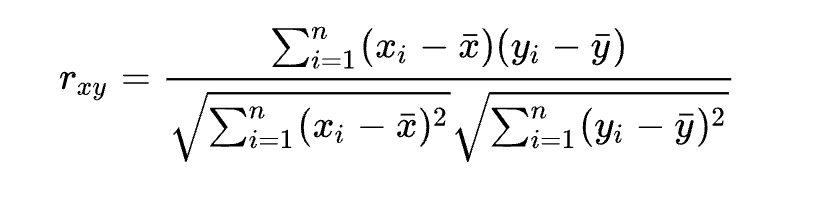

In [20]:
def pearson_corr(x: np.array, y: np.array) -> float:
    x_mean = x.mean()
    y_mean = y.mean()
    prod_sum = sum([(x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y)])
    prod_sqrt_sum_x = np.sqrt(sum([(x_i - x_mean)**2 for x_i in x]))
    prod_sqrt_sum_y = np.sqrt(sum([(y_i - y_mean)**2 for y_i in y]))
    corr = prod_sum / ( prod_sqrt_sum_y * prod_sqrt_sum_x)
    return corr

assert np.allclose(
    pearson_corr(np.array([1, 2, 3]), np.array([1, 2, 3])),
    1.0
    )
 
assert np.allclose(
      np.corrcoef(np.array([1, 2, 3]), np.array([1, 2,3]))[0, 1],
      pearson_corr(np.array([1, 2, 3]), np.array([1, 2,3]))
      )

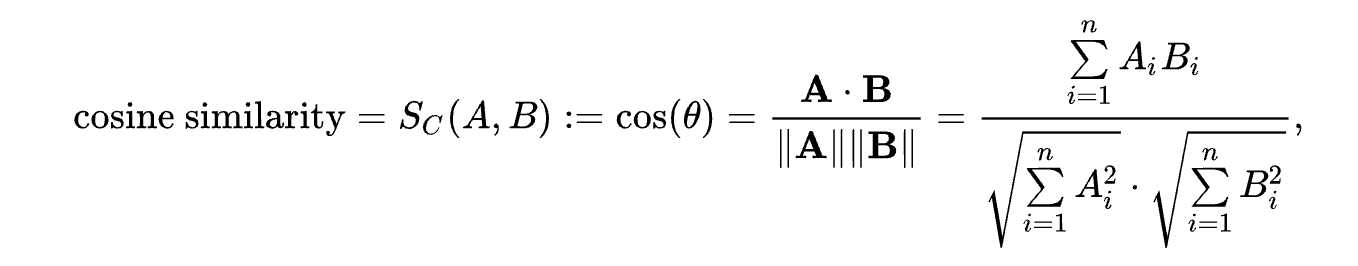

In [21]:
from scipy.spatial.distance import cosine

def cosine_similarity(
        x: np.array, 
        y: np.array
        ) -> float:
    
    x = x.flatten()
    y = y.flatten()

    dot = np.dot(x, y)
    x_magnitude = np.linalg.norm(x)
    y_magnitude = np.linalg.norm(y)
    cos_sim = dot / (x_magnitude * y_magnitude)
    return cos_sim

assert np.allclose(
    cosine_similarity(vec1, vec2),
    1 - cosine(vec1.flatten(), vec2.flatten())
    )

# функцию нормализации реализовал выше

In [22]:
normalize_vector # cmd + click the func

<function __main__.normalize_vector(vec: <built-in function array>)>

In [23]:
duration_norm = normalize_vector(duration_vec)
temp_norm = normalize_vector(temp)
capacity_norm = normalize_vector(capacity_vec)
humidity_norm = normalize_vector(humidity)
timestamp_norm = normalize_vector(timestamp_vec)

In [25]:
duration_norm

array([0.00348135, 0.00385435, 0.00559503, ..., 0.00646537, 0.00422736,
       0.00683837], shape=(39705,))

In [26]:
assert np.allclose(
        np.linalg.norm(duration_norm),
        1.
        )

In [27]:
data = np.array([list(range(31)), # days
          [10] + [20 for _ in range(29)] + [9], # temp
          humidity[:31] # hunidity
          ])

first_data_day = data[1:, 0:1]

remaining_days = data[1:, 1:]



In [28]:
 

def find_sim_days(
        query_vec: np.array,
        vec_data: np.array,
        top_k: int = 3
            ) -> tuple[list[int], list[float]]:
    
    similarities = []

    for i in range(vec_data.shape[1]):
        data_day = remaining_days[:, i]
        similarity = cosine_similarity(query_vec, data_day)
        similarities.append([similarity, i]) # (similarity, idx)

    similarities.sort(key=lambda x: x[1], reverse=True)

    indices = [item[0] for item in similarities[:top_k]]
    sim_values = [item[1] for item in similarities[:top_k]]

    return indices, sim_values

    

sim_results = find_sim_days(first_data_day,
              remaining_days,
            )   
        
sim_results


([np.float64(0.9998690936703856),
  np.float64(0.9896880221246718),
  np.float64(0.9904589217175948)],
 [29, 28, 27])

```
Фильтрация временных рядов:
○
Реализуйте простой фильтр временных рядов, используя скалярное
произведение. Примените его для сглаживания данных о прокате
велосипедов.
○
Экспериментируйте с разными ядрами (например, для выделения
трендов или сглаживания).

```

In [29]:


class KernelProvider(Protocol):
    def get_kernel_weights(self) -> np.ndarray: ...

class SmoothingKernel:
    def get_kernel_weights(self) -> np.ndarray:
        return np.array([1/3, 1/3, 1/3])

class GaussianKernel:
    def get_kernel_weights(self) -> np.ndarray:
        return np.array([0.25, 0.5, 0.25])

class TrendDetectionKernel:
    def get_kernel_weights(self) -> np.ndarray:
        return np.array([-0.25, 0.5, -0.25])

class EdgeDetectionKernel:
    def get_kernel_weights(self) -> np.ndarray:
        return np.array([-1, 0, 1]) / 2

def apply_filter_kernel(
        data: np.ndarray,
        kernel_provider: KernelProvider
        ) -> np.ndarray:
    
    kernel_weights = kernel_provider.get_kernel_weights()
    filtered_data = []
    half_kernel = len(kernel_weights) // 2

    for i in range(half_kernel, len(data) - half_kernel):
        window = data[i - half_kernel:i + half_kernel + 1]
        filtered_value = np.dot(window, kernel_weights)
        filtered_data.append(filtered_value)

    return np.array(filtered_data)

smoothing = SmoothingKernel()
gaussian = GaussianKernel()
trend_detector = TrendDetectionKernel()
edge_detector = EdgeDetectionKernel()

 

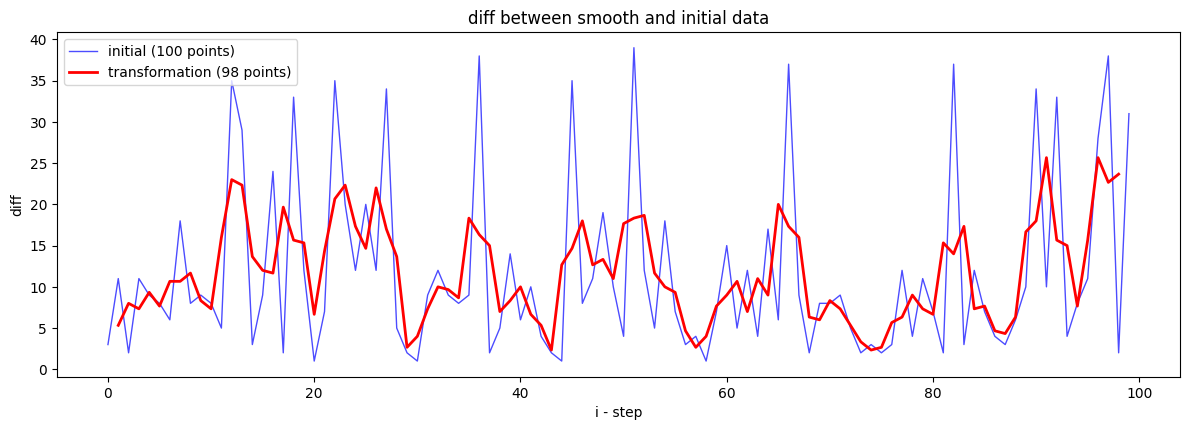

In [30]:
import matplotlib.pyplot as plt

def draw_diff_graph(
    df: pl.DataFrame,
    col: str,
    samples: int,
    kernel: KernelProvider,
    kernel_size: int = 3
    ) -> None:
    

    rentals_data = df[col].head(samples).to_numpy()

    rentals_smooth = apply_filter_kernel(rentals_data, kernel)

    n_original = len(rentals_data)  # 100
   
    offset = kernel_size // 2  # 1

    x_original = np.arange(n_original)

    x_filtered = np.arange(offset, n_original - offset) # 1, 99

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.plot(x_original, rentals_data, 'b-', alpha=0.7, linewidth=1,
    label='initial (100 points)')
    plt.plot(x_filtered, rentals_smooth, 'r-', linewidth=2,
    label='transformation (98 points)')
    plt.title('diff between smooth and initial data')
    plt.xlabel('i - step')
    plt.ylabel('diff')
    plt.legend()

    plt.tight_layout()
    plt.show()

draw_diff_graph(unified_df_timestamp, "avg_rentals_per_month", 100, smoothing)
 

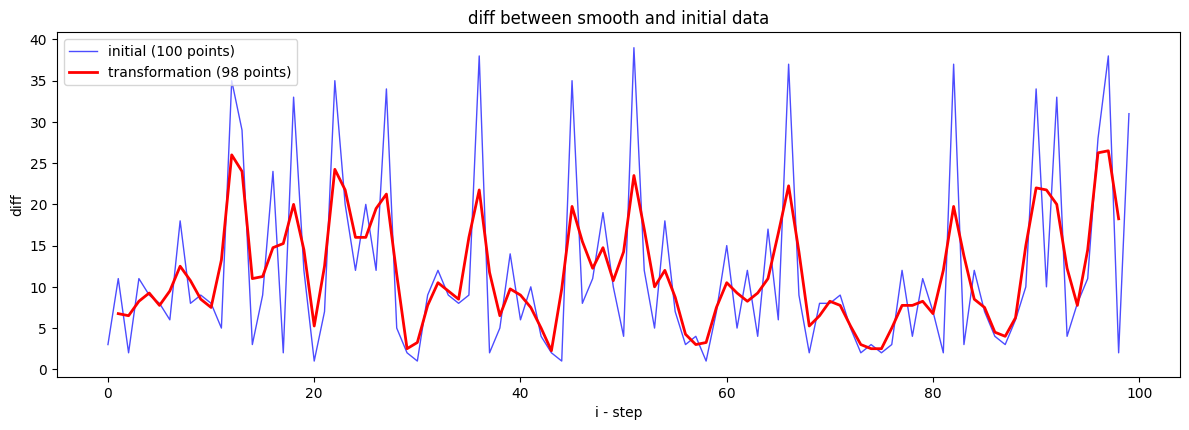

In [31]:
draw_diff_graph(unified_df_timestamp, "avg_rentals_per_month", 100, gaussian)
 

Реализуйте алгоритм кластеризации методом k-средних с
использованием NumPy, чтобы группировать дни по схожести в прокате
велосипедов.
○
Начните с фиксированного числа кластеров, а затем исследуйте, как
влияет изменение значения k на результаты.

In [32]:
rentals_data = unified_df_timestamp[["unix_timestamp", "avg_rentals_per_month", "usage_intensity"]]

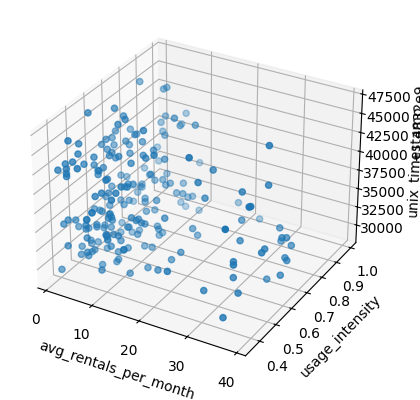

In [33]:

 
x = rentals_data["avg_rentals_per_month"][:220]
y = rentals_data["usage_intensity"][:220]
z = rentals_data["unix_timestamp"][:220]

 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x, y, z)

ax.set_xlabel("avg_rentals_per_month")
ax.set_ylabel("usage_intensity")
ax.set_zlabel("unix_timestamp")

plt.show()

In [34]:
def get_euclidian_distance(
        vec1: np.array,
        vec2: np.array
        ) -> np.float64:
    
    vec1_flatten = vec1.flatten()
    vec2_flatten = vec2.flatten()


    if vec1_flatten.shape != vec2_flatten.shape:
        return Exception("sizes of vectors are diff")

    squared_diff = (vec1_flatten - vec2_flatten) ** 2

    sum_of_squares = squared_diff.sum()

    return np.sqrt(sum_of_squares)

vec1 = np.array([10, 20, 30, 40, 50])
vec2 = np.array([0, 10, 20, 30, 40])

get_euclidian_distance(vec1, vec1)

assert np.allclose(
    get_euclidian_distance(np.array([10, 20, 30, 40, 50]), np.array([10, 20, 30, 40, 50])),
    0.
)

assert np.allclose(
    get_euclidian_distance(np.array([10, 20, 30, 40, 50]), np.array([10, 20, 30, 40, 40])),
    10.
)

In [35]:
def init_points(
    data: np.array,
    k: int = 3,
    random_seed: int = 927
    ) -> np.ndarray: 
    
    n_points = data.shape[-1]
    
    np.random.seed(random_seed)   
    random_indices = np.random.choice(n_points, k, replace=False)
    cluster_centers = data[:, random_indices]
    return cluster_centers

init_points(data, random_seed=342)

def get_dist(sample, centers, k):
    distances = [get_euclidian_distance(sample, centers[:, j]) for j in range(k)]
    return distances


In [36]:
row1 = [val + np.random.random() for _ in range(10) for val in range(10, 31, 10)]
row2 = [val + np.random.random() for _ in range(10) for val in range(10, 31, 10)]

data = np.array([row1, row2])

data

array([[10.26053234, 20.76526283, 30.46496684, 10.00563552, 20.34846938,
        30.57542244, 10.91495747, 20.73817439, 30.70326841, 10.32232843,
        20.87857246, 30.32181898, 10.90024109, 20.14306953, 30.60524163,
        10.18284846, 20.85911798, 30.12398106, 10.72877345, 20.22461531,
        30.22441108, 10.723383  , 20.38626895, 30.60817418, 10.07359718,
        20.32425695, 30.77953006, 10.16575363, 20.34825343, 30.31811845],
       [10.41858151, 20.53505062, 30.87804837, 10.42886563, 20.66486223,
        30.17184156, 10.00095722, 20.17352563, 30.29842009, 10.05315918,
        20.71637188, 30.80618103, 10.06520587, 20.1433651 , 30.30095424,
        10.47882205, 20.7182879 , 30.03736425, 10.58827427, 20.91145177,
        30.54841648, 10.35159899, 20.28640275, 30.51582699, 10.3727606 ,
        20.62245234, 30.5474127 , 10.82188432, 20.0480448 , 30.67633262]])

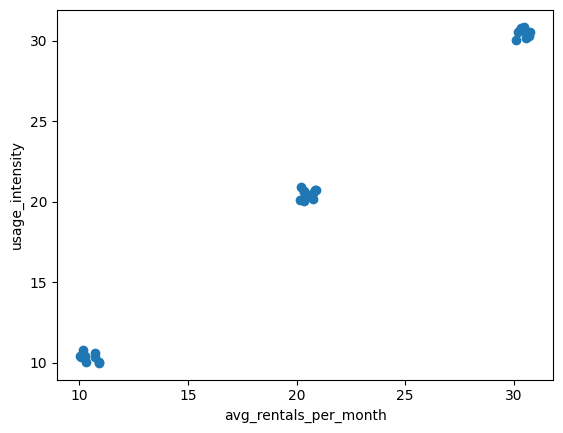

In [37]:
x = data[0]
y = data[1]
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
ax.scatter(x, y)

ax.set_xlabel("avg_rentals_per_month")
ax.set_ylabel("usage_intensity")

plt.show()

In [38]:
def cluster_using_kmeans(
        data: np.ndarray,
        k: int = 3, 
        max_iters: int = 100,
        atol: float = 1e-9
        ) -> tuple[list[list[np.ndarray]], np.ndarray]:
    
    if not isinstance(data, np.ndarray):
          data = np.array(data)

    n_points = data.shape[-1]
    cluster_centers = init_points(data, k)

    
    for iteration in range(max_iters):
        clusters = [[] for _ in range(k)]  
        cluster_assignments = {}

        for i in range(n_points):
            sample = data[:, i]
            distances = get_dist(sample, cluster_centers, k)      
            
            closest_cluster = np.argmin(distances) # 0,1,2...,k
            clusters[closest_cluster].append(sample)
            cluster_assignments[i] = closest_cluster

        for idx, cluster in enumerate(clusters):
            if len(cluster) == 0:

                clusters[idx] = init_points(data, k).T
           
        centroids = []
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(cluster, axis=0)
            centroids.append(new_centroid)
            

        if np.allclose(cluster_centers, np.array(centroids).T, atol=atol):
            print(f"end of process: {iteration + 1}")
            break
   
        cluster_centers = np.array(centroids).T

    return clusters, cluster_centers

clusters, cluster_centers = cluster_using_kmeans(data)
print(f"shapes: {[np.array(cluster).shape for cluster in clusters]}")

# tests https://github.com/artemguivan/k-means

end of process: 3
shapes: [(10, 2), (10, 2), (10, 2)]


V. Генерация случайных данных и анализ
1. Генерация случайных данных:
○
Используйте np.random для генерации случайных данных, которые
могут быть использованы для тестирования ваших функций. Например,
сгенерируйте случайные погодные условия и соответствующие значения
проката велосипедов.

In [39]:
def generate_bike_rental_data(
    n_samples: int = 1000
    ) -> dict:

      np.random.seed(42)

      real_duration = unified_df_timestamp["duration_minutes"].to_numpy()
      real_capacity = unified_df_timestamp["capacity"].to_numpy()
      real_usage = unified_df_timestamp["usage_intensity"].to_numpy()
      real_timestamp = unified_df_timestamp["unix_timestamp"].to_numpy()

      duration_mean = np.mean(real_duration)
      duration_std = np.std(real_duration)
      random_duration = np.random.normal(duration_mean, duration_std, n_samples)
      random_duration = np.clip(random_duration, 5, 120)  # add to consts
   
      capacity_min, capacity_max = np.min(real_capacity), np.max(real_capacity)
      random_capacity = np.random.randint(capacity_min, capacity_max + 1, n_samples)


      base_usage = np.random.uniform(0.1, 0.9, n_samples)

      capacity_factor = (random_capacity - capacity_min) / (capacity_max - capacity_min)
      random_usage = base_usage * (0.7 + 0.6 * capacity_factor)
      random_usage = np.clip(random_usage,0.1, 1.0)

      
      timestamp_min, timestamp_max = np.min(real_timestamp), np.max(real_timestamp)
      random_timestamp = np.random.randint(timestamp_min, timestamp_max + 1, n_samples)

      return {
          'duration_minutes':
  random_duration,
          'capacity': random_capacity,
          'usage_intensity': random_usage,
          'unix_timestamp': random_timestamp
      }

random_bike_data = generate_bike_rental_data(2000)
random_df = pl.DataFrame(random_bike_data)
random_df

def get_info_about_data(
    df: pl.DataFrame
    ) -> None:
    print(f"Duration: {df['duration_minutes'].min():.1f} - {df['duration_minutes'].max():.1f}")
    print(f"Capacity: {df['capacity'].min()} - {df['capacity'].max()}")
    print(f"Usage: {df['usage_intensity'].min():.3f} - {df['usage_intensity'].max():.3f}")
    print(f"Timestamp: {df['unix_timestamp'].min()} - {df['unix_timestamp'].max()}")

random_bike_data = generate_bike_rental_data(2000)
random_df = pl.DataFrame(random_bike_data)
original_df = unified_df_timestamp[:2000]
print("generated:")
get_info_about_data(random_df)

print("\noriginal:")
get_info_about_data(original_df)


generated:
Duration: 5.0 - 108.5
Capacity: 15 - 59
Usage: 0.100 - 1.000
Timestamp: 1483228897 - 1485823405

original:
Duration: 10.0 - 120.0
Capacity: 15 - 59
Usage: 0.360 - 0.990
Timestamp: 1483228860 - 1483358340



2. Анализ случайных данных:


○
Сравните случайные данные с реальными данными, используя методы
корреляции и сходства.


### насколько я понимаю надо было сделать примерно вот так

In [40]:
cols_to_check = random_df.columns

def get_corr_and_cos_sim_analysis(
    cols: list[str]
    ) -> None:
    
    for col in cols:
        corr = pearson_corr(random_df[col].to_numpy(), original_df[col].to_numpy())
        cos_sim = cosine_similarity(random_df[col].to_numpy(), original_df[col].to_numpy())
        print(f"report for {col}: \ncorr_pearson: {round(corr, 5)} \ncos_sim: {round(cos_sim, 5)}")
        print("\n")
    
get_corr_and_cos_sim_analysis(cols_to_check)

report for duration_minutes: 
corr_pearson: 0.04527 
cos_sim: 0.78252


report for capacity: 
corr_pearson: -0.00424 
cos_sim: 0.90072


report for usage_intensity: 
corr_pearson: -0.01973 
cos_sim: 0.86238


report for unix_timestamp: 
corr_pearson: -0.00432 
cos_sim: -0.00108




VI. Визуализация результатов
1. Визуализация данных:
○
Используйте библиотеку matplotlib для визуализации различных
графиков. Например, отображайте тренды изменения проката
велосипедов в зависимости от погодных условий, графики
кластеризации или результаты фильтрации временных рядов.

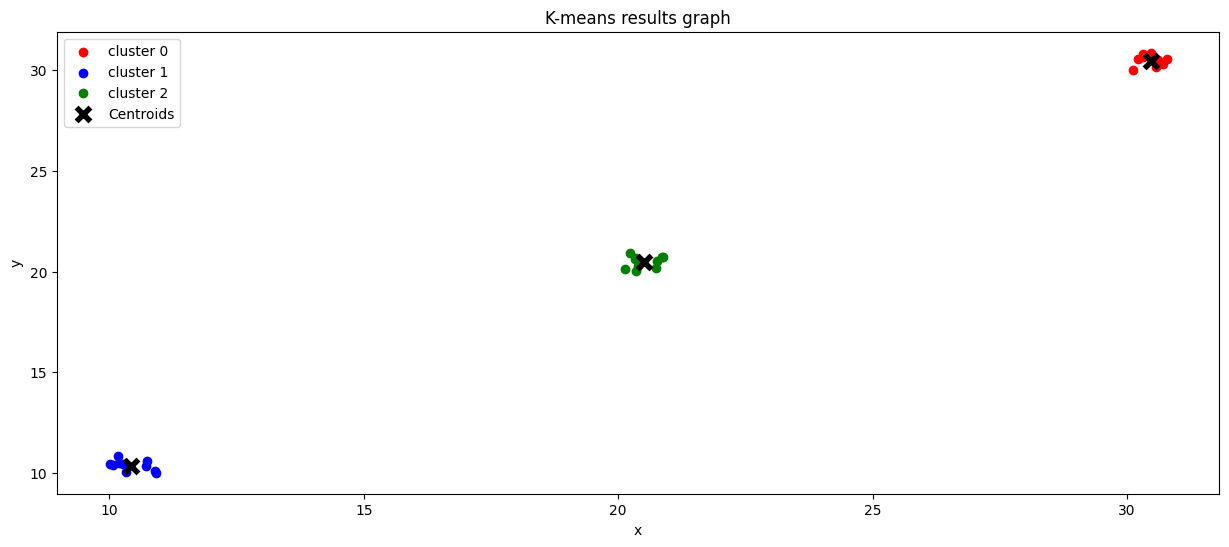

In [42]:
def visualize_kmeans_clusters(
    clusters: np.ndarray, 
    cluster_centers,
    data_original=None):

    if not isinstance(clusters, np.ndarray):
        clusters = np.array(clusters)
    fig, axes = plt.subplots(1, 1, figsize=(15, 6))

    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

    ax1 = axes

    for i, cluster in enumerate(clusters):
        ax1.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)],
                label=f'cluster {i} ')

    ax1.scatter(cluster_centers[0, :], cluster_centers[1, :], c='black', 
        marker='x', s=100, linewidths=4, label='Centroids')


    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('K-means results graph')
    ax1.legend()

visualize_kmeans_clusters(clusters, cluster_centers, data)

### после claude

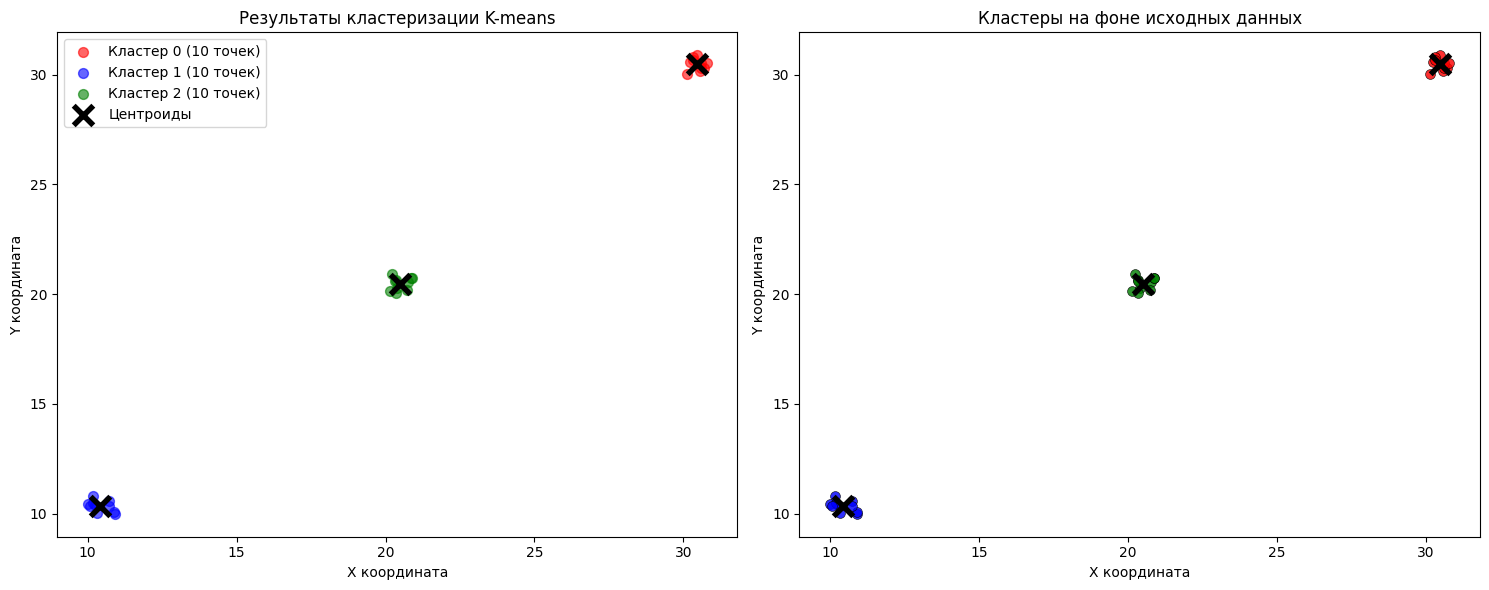

 Статистика кластеризации:
  Кластер 0: 10 точек
    Центр: (30.47, 30.48)
    Среднее расстояние до центра: 0.31
  Кластер 1: 10 точек
    Центр: (10.43, 10.36)
    Среднее расстояние до центра: 0.39
  Кластер 2: 10 точек
    Центр: (20.50, 20.48)
    Среднее расстояние до центра: 0.37


In [43]:
def visualize_kmeans_clusters(
    clusters: np.ndarray, 
    cluster_centers,
    data_original=None):

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

    ax1 = axes[0]

    for i, cluster in enumerate(clusters):
        cluster_array = np.array(cluster)
        ax1.scatter(cluster_array[:,0], cluster_array[:, 1], c=colors[i % len(colors)], 
            alpha=0.6, s=50, label=f'Кластер {i} ({len(cluster)} точек)')


    ax1.scatter(cluster_centers[0, :], cluster_centers[1, :], c='black', 
        marker='x', s=200, linewidths=4, label='Центроиды')

    ax1.set_xlabel('X координата')
    ax1.set_ylabel('Y координата')
    ax1.set_title('Результаты кластеризации K-means')
    ax1.legend()

    # graph 2

    ax2 = axes[1]

    if data_original is not None:
        # Показываем исходные данные серым
        ax2.scatter(data_original[0, :], data_original[1, :], c='lightgray', alpha=0.3, s=30, label='Исходные данные')

    
    for i, cluster in enumerate(clusters):
        if len(cluster) > 0:
            cluster_array = np.array(cluster)
            ax2.scatter(cluster_array[:,0], cluster_array[:, 1],
                        c=colors[i %len(colors)], alpha=0.8, s=50,
                        edgecolors='black', linewidth=0.5)

    # Центроиды
    ax2.scatter(cluster_centers[0, :], cluster_centers[1, :], c='black', marker='x',
        s=200, linewidths=4)

    ax2.set_xlabel('X координата')
    ax2.set_ylabel('Y координата')
    ax2.set_title('Кластеры на фоне исходных данных')

    plt.tight_layout()
    plt.show()

    print(" Статистика кластеризации:")
    for i, cluster in enumerate(clusters):
        print(f"  Кластер {i}: {len(cluster)} точек")
        cluster_array = np.array(cluster)
        print(f"    Центр: ({cluster_centers[0, i]:.2f}, {cluster_centers[1, i]:.2f})")
        print(f"    Среднее расстояние до центра: {np.mean(np.linalg.norm(cluster_array - cluster_centers[:, i:i+1].T, axis=1)):.2f}")



# Использование:
visualize_kmeans_clusters(clusters, cluster_centers, data)
 


# bad realizations of k-means

In [44]:

def get_clusters(
        data: np.ndarray,
        k: int = 3,
        atol: float = 1e-4,
        max_iters: int = 1000
        ) -> dict[int, int]:
    """
    return {index : cluster}
    """
    cluster_centers = data[:, :k]
    remaining_data = data[:, k:]

    k_dists_central_clusters = {}
    for i in range(remaining_data.shape[-1]):
        sample = remaining_data[:, i]

        idx_min_dist = 0
        min_dist = get_euclidian_distance(sample, cluster_centers[:, idx_min_dist])

        for idx in range(1, cluster_centers.shape[-1]):
            curr_dist = get_euclidian_distance(sample, cluster_centers[:, idx])
            if curr_dist < min_dist:
                min_dist = curr_dist
                idx_min_dist = idx
        
        k_dists_central_clusters[i] = idx_min_dist

    clusters = [[] for _ in range(k)]
    for clustered_idx in range(len(k_dists_central_clusters.values())):
        idx = k_dists_central_clusters[clustered_idx]
        cl_data = remaining_data[:, clustered_idx]

        clusters[idx].append(cl_data)

    
    return clusters

norm_clusters = get_clusters(data, 3)

def update_centroids(
        clustered_points: np.array
        ) -> np.array:

    new_centroids = []

    for cluster in clustered_points:
        if len(cluster) > 0:  
            cluster_matrix = np.array(cluster)

            centroid = np.mean(cluster_matrix, axis=0)
            new_centroids.append(centroid)
        else:
            
            new_centroids.append(np.array([0.0, 0.0]))

    return new_centroids

new_centroids = update_centroids(norm_clusters)
new_centroids


    

[array([10.44639091, 10.3512809 ]),
 array([20.47231093, 20.47608493]),
 array([30.47332959, 30.43363889])]

In [ ]:


# def kmeans_fixed(data: np.ndarray, k: int = 3, max_iters: int = 100):
#     if not isinstance(data, np.ndarray):
#           data = np.array(data)

#     n_points = data.shape[-1]
#     cluster_centers = init_points(data, k, random_seed=945)

    
#     for iteration in range(max_iters):
        

#         clusters = [[] for _ in range(k)] # [[], [], []]
#         cluster_assignments = {}

#         for i in range(n_points):
#             sample = data[:, i]
#             distances = get_dist(sample, cluster_centers, k)      
            
            
#             closest_cluster = np.argmin(distances) # 0,1,2...,k
#             clusters[closest_cluster].append(sample)
#             cluster_assignments[i] = closest_cluster

        

#         # # change centroids
#         # centroids = []
#         # for idx, cluster in enumerate(clusters):
#         #     new_centroid = np.mean(cluster, axis=0) # 
#         #     centroids.append(new_centroid.tolist())
            
#         # cluster_centers = centroids
#         # print(cluster_centers)

#     return clusters, cluster_centers


# clusters, cluster_centers = kmeans_fixed(data)

 

In [601]:



# def kmeans_fixed(data: np.ndarray, k: int = 3, max_iters: int = 100):
#     if not isinstance(data, np.ndarray):
#           data = np.array(data)

#     n_points = data.shape[-1]
#     cluster_centers = init_points(data, k, random_seed=945)

    
#     for iteration in range(max_iters):
        
#         print(cluster_centers.shape) # (2, 3)

#         clusters = [[] for _ in range(k)] # [[], [], []]
#         cluster_assignments = {}

#         for i in range(n_points):
#             sample = data[:, i]
#             distances = get_dist(sample, cluster_centers, k)      
            
            
#             closest_cluster = np.argmin(distances) # 0,1,2...,k
#             clusters[closest_cluster].append(sample)
#             cluster_assignments[i] = closest_cluster

        

#         centroids = []
#         for idx, cluster in enumerate(clusters):
#             new_centroid = np.mean(cluster, axis=0)
#             print(new_centroid, cluster)
#             centroids.append(new_centroid)
        
        
#         cluster_centers = np.array(centroids).T

#     return clusters, cluster_centers


# clusters, cluster_centers = kmeans_fixed(data)


### падает из-за того что массивы могут быть пустыми кластеры

In [602]:



# def kmeans_fixed(data: np.ndarray, k: int = 3, max_iters: int = 100):
#     if not isinstance(data, np.ndarray):
#           data = np.array(data)

#     n_points = data.shape[-1]
#     cluster_centers = init_points(data, k, random_seed=945)

    
#     for iteration in range(max_iters):
#         clusters = [[] for _ in range(k)] # [[], [], []]
#         cluster_assignments = {}

#         for i in range(n_points):
#             sample = data[:, i]
#             distances = get_dist(sample, cluster_centers, k)      
            
            
#             closest_cluster = np.argmin(distances) # 0,1,2...,k
#             clusters[closest_cluster].append(sample)
#             cluster_assignments[i] = closest_cluster

        

#         for cluster in clusters:
#             print(len(cluster), "was")
#             if len(cluster) == 0:
#                 cluster = init_points(data, random_seed=342)
#             print(len(cluster), " now")  
                
#         centroids = []
#         for idx, cluster in enumerate(clusters):
#             new_centroid = np.mean(cluster, axis=0)
#             centroids.append(new_centroid)
        
        
#         cluster_centers = np.array(centroids).T

#     return clusters, cluster_centers


# clusters, cluster_centers = kmeans_fixed(data)


### меняю локальную копию

In [603]:
# def kmeans_fixed(
#         data: np.ndarray,
#         k: int = 3, 
#         max_iters: int = 100
#         ) -> tuple[list[list[np.ndarray]], np.ndarray]:
    
#     if not isinstance(data, np.ndarray):
#           data = np.array(data)

#     n_points = data.shape[-1]
#     cluster_centers = init_points(data, k)

    
#     for iteration in range(max_iters):
#         clusters = [[] for _ in range(k)]  
#         cluster_assignments = {}

#         for i in range(n_points):
#             sample = data[:, i]
#             distances = get_dist(sample, cluster_centers, k)      
            
            
#             closest_cluster = np.argmin(distances) # 0,1,2...,k
#             clusters[closest_cluster].append(sample)
#             cluster_assignments[i] = closest_cluster

        

#         for idx, cluster in enumerate(clusters):
#             if len(cluster) == 0:

#                 clusters[idx] = init_points(data, k).T
           
  
#         centroids = []
#         for idx, cluster in enumerate(clusters):
#             new_centroid = np.mean(cluster, axis=0)
#             centroids.append(new_centroid)
   
#         cluster_centers = np.array(centroids).T

#     return clusters, cluster_centers


# clusters, cluster_centers = kmeans_fixed(data)



In [1]:
# <!-- <!-- def analyze_clustering_quality(clusters, 
# cluster_centers):
#     """Анализирует качество 
# кластеризации"""

#     # Внутрикластерная сумма квадратов 
# (WCSS)
#     wcss = 0
#     for i, cluster in enumerate(clusters):
#         if len(cluster) > 0:
#             cluster_array =
# np.array(cluster)
#             centroid = cluster_centers[:,
# i]
#             wcss += np.sum((cluster_array -
# centroid)**2)

#     # Средний размер кластера
#     non_empty_clusters = [len(c) for c in
# clusters if len(c) > 0]
#     avg_cluster_size =
# np.mean(non_empty_clusters) if
# non_empty_clusters else 0

#     # Коэффициент вариации размеров 
# кластеров
#     cv_cluster_sizes =
# np.std(non_empty_clusters) /
# avg_cluster_size if avg_cluster_size > 0
# else 0

#     print(f"\n Качество кластеризации:")
#     print(f"  WCSS (внутрикластерная сумма 
# квадратов): {wcss:.2f}")
#     print(f"  Средний размер кластера: 
# {avg_cluster_size:.1f}")
#     print(f"  Коэффициент вариации 
# размеров: {cv_cluster_sizes:.3f}")
#     print(f"  Количество непустых 
# кластеров: {len(non_empty_clusters)}")

#     return wcss, avg_cluster_size,
# cv_cluster_sizes -->


# # Функция для сравнения разных значений k
# def compare_different_k(data, k_values=[2, 
# 3, 4, 5]):
#     """Сравнивает результаты кластеризации 
# для разных k"""

#     fig, axes = plt.subplots(2, 2,
# figsize=(15, 12))
#     axes = axes.flatten()

#     wcss_values = []

#     for idx, k in enumerate(k_values):
#         if idx < 4:  # Ограничиваем 4 
# графиками
#             clusters_k, centers_k =
# cluster_using_kmeans(data, k=k,
# max_iters=50)

#             ax = axes[idx]
#             colors = ['red', 'blue',
# 'green', 'purple', 'orange']

#             for i, cluster in
# enumerate(clusters_k):
#                 if len(cluster) > 0:
#                     cluster_array =
# np.array(cluster)

# ax.scatter(cluster_array[:, 0],
# cluster_array[:, 1],
#                             c=colors[i %
# len(colors)], alpha=0.6, s=40)

#             ax.scatter(centers_k[0, :],
# centers_k[1, :],
#                     c='black',
# marker='x', s=150, linewidths=3)
#             ax.set_title(f'K = {k}')
#             ax.grid(True, alpha=0.3)

#             # Вычисляем WCSS
#             wcss = 0
#             for i, cluster in
# enumerate(clusters_k):
#                 if len(cluster) > 0:
#                     cluster_array =
# np.array(cluster)
#                     wcss +=
# np.sum((cluster_array - centers_k[:,
# i])**2)
#             wcss_values.append(wcss)

#     plt.tight_layout()
#     plt.show()

#     # График метода локтя
#     plt.figure(figsize=(10, 6))
#     plt.plot(k_values, wcss_values, 'bo-',
# linewidth=2, markersize=8)
#     plt.xlabel('Количество кластеров (k)')
#     plt.ylabel('WCSS')
#     plt.title('Метод локтя для выбора 
# оптимального k')
#     plt.grid(True, alpha=0.3)

#     # Находим "локоть"
#     if len(wcss_values) >= 3:
#         differences = np.diff(wcss_values)
#         second_diff = np.diff(differences)
#         if len(second_diff) > 0:
#             elbow_idx =
# np.argmax(second_diff) + 2

# plt.axvline(x=k_values[elbow_idx],
# color='red', linestyle='--',

# label=f'Рекомендуемое k = 
# {k_values[elbow_idx]}')
#             plt.legend()

#     plt.show()

#     return wcss_values

 
#   -->


In [2]:


# def get_clusters(
#         data: np.ndarray,
#         k: int = 3,
#         atol: float = 1e-4,
#         max_iters: int = 1000
#         ) -> dict[int, int]:
#     """
#     return {index : cluster}
#     """
#     cluster_centers = data[:, :k]
#     remaining_data = data[:, k:]

#     k_dists_central_clusters = {}
#     for i in range(remaining_data.shape[-1]):
#         sample = remaining_data[:, i]

#         idx_min_dist = 0
#         min_dist = get_euclidian_distance(sample, cluster_centers[:, idx_min_dist])

#         for idx in range(1, cluster_centers.shape[-1]):
#             curr_dist = get_euclidian_distance(sample, cluster_centers[:, idx])
#             if curr_dist < min_dist:
#                 min_dist = curr_dist
#                 idx_min_dist = idx
        
#         k_dists_central_clusters[i] = idx_min_dist

#     clusters = [[] for _ in range(k)]
#     for clustered_idx in range(len(k_dists_central_clusters.values())):
#         idx = k_dists_central_clusters[clustered_idx]
#         cl_data = remaining_data[:, clustered_idx]

#         clusters[idx].append(cl_data)

    
#     return clusters

# norm_clusters = get_clusters(data, 3)

# def update_centroids(
#         clustered_points: np.array
#         ) -> np.array:

#     new_centroids = []

#     for cluster in clustered_points:
#         if len(cluster) > 0:  
#             cluster_matrix = np.array(cluster)

#             centroid = np.mean(cluster_matrix, axis=0)
#             new_centroids.append(centroid)
#         else:
            
#             new_centroids.append(np.array([0.0, 0.0]))

#     return new_centroids

# new_centroids = update_centroids(norm_clusters)
# new_centroids


    

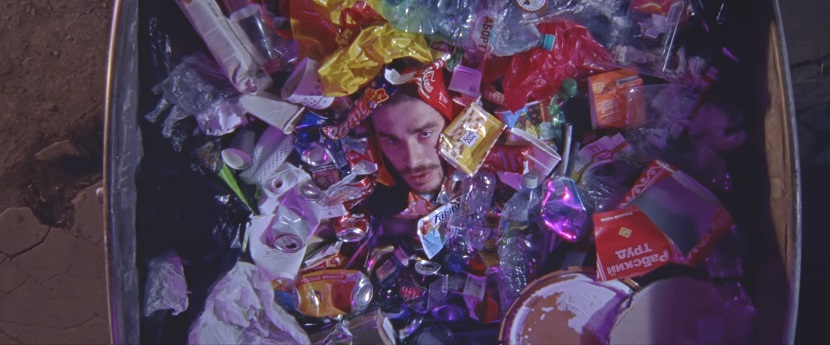

Повсюду искал я покоя и в одном лишь месте обрел его – в углу, с книгою. единственная твердая истина – что надо освобождаться от нездоровой страсти к истине